![planets](https://exoplanets.nasa.gov/internal_resources/1806)
____
## Wed ICA
____

The goal of today's ICA is to become familiar with some of the tools for dealing with missingness in a dataset. The dataset you will use is the planets dataset, which is easily obtained from Seaborn.

👉🏻 Your first task is to read the next few cells, where I will get you started.

name: Mikayla Norton

group members:
* Bingqing Wang
* Sahithi Sane
* Pranit Ahuja

Let's first get the dataset and look at what it contains. Do you see any possible issues with missingness?

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

df = sns.load_dataset("planets")
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [2]:
df.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,method,number,orbital_period,mass,distance,year
7,Radial Velocity,1,798.500000,NaN,21.41,1996
20,Radial Velocity,5,0.736540,NaN,12.53,2011
25,Radial Velocity,1,116.688400,NaN,18.11,1996
26,Radial Velocity,1,691.900000,NaN,81.50,2012
29,Imaging,1,NaN,NaN,45.52,2005
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [31]:
vcountsNA = list(df[df["mass"].isna()]["method"].value_counts()[df.method.unique()])
vcountsTotal = df["method"].value_counts()[df.method.unique()]

<Axes: >

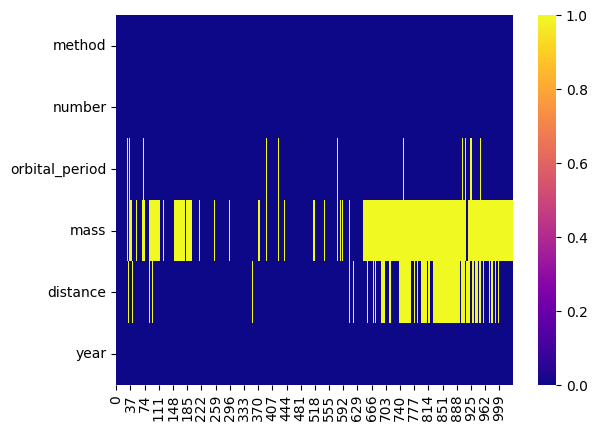

In [32]:
sns.heatmap(df.isna().transpose(), cmap="plasma")

In [33]:
#to observe proportional missingness by method
vcountsNA/vcountsTotal

method
Radial Velocity                  0.077758
Imaging                          1.000000
Eclipse Timing Variations        0.777778
Transit                          0.997481
Astrometry                       1.000000
Transit Timing Variations        1.000000
Orbital Brightness Modulation    1.000000
Microlensing                     1.000000
Pulsar Timing                    1.000000
Pulsation Timing Variations      1.000000
Name: count, dtype: float64

As I mentioned in the lecture, it is good EDA practice to visualize the missing data in the dataset. Discuss some of the topics below with your group, and perhaps invent some ideas of your own.

In particular, discuss with your group possible missingness issues. That is, it is clear there is missing data, but what do you think about its missingness? As a reminder: is the data missing in a given column random, or is it grouped? For those columns that are grouped, how are they grouped - is there a pattern? Or, is the missing data in one column correlated with values in another column or missing data in another column?

👉🏻 Summarize your discussions in a markdown cell.

By visualizing the missingness in tabular and graphic forms, we can see that there is missingness in orbital period, mass, and distance, especially mass. The missingness does appear to be clustered for mass and distance but random for orbital period. It peaks my interest that mass and distance missingness could be correlated or perhaps correlated with the method variable. The last tabular output above shows a percentage of rows with missing values for mass per method. It is shown that all excluding Radial Velocity and Eclipse Timing Variations (although this value is still high) have close to 100% of rows holding some missingness. In addition, when orbital period is missing, so is mass.

Look at the code below. Try the various options by commenting out different lines. Try your own visualization styles; are there options [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html) that improve the visualization? Compare your ideas with your group members and discuss in a markdown cell what ideas you prefer for visualizing missingness.

<Axes: >

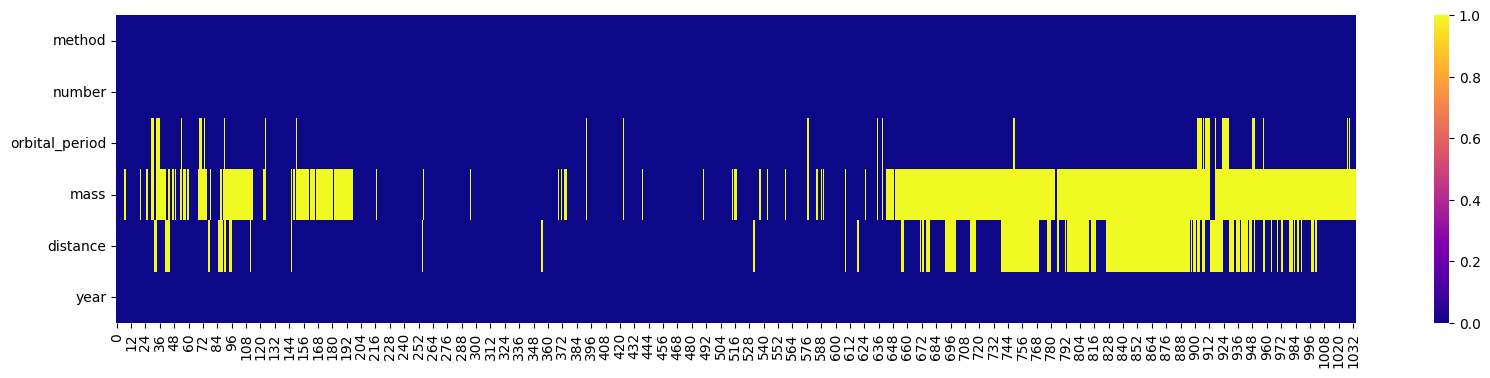

In [41]:

# plt.figure(figsize=(4,8))
sns.heatmap(df.isna().transpose(), cmap="plasma")
# sns.heatmap(df.isna(), cmap="viridis")
#sns.heatmap(df.isna(), cmap="magma")

For transposed data, the first figure size is most easy to view. Personally I prefer the transposed forms, so that I do not have to read labels sideways either. However a (20,4) is quite small. I have generated my ideal viz below:

<Axes: >

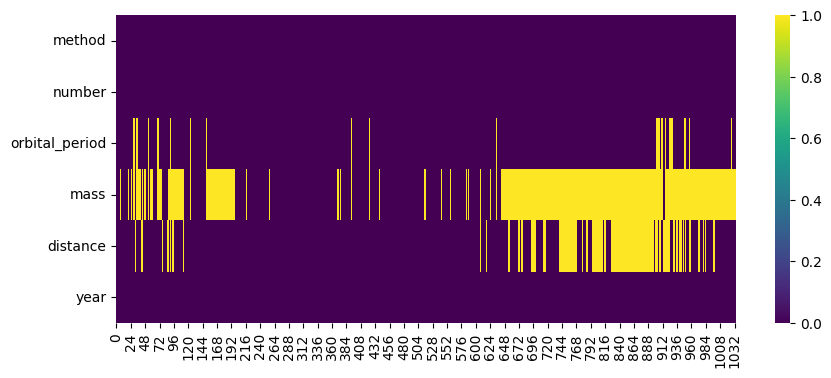

In [47]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isna().transpose(), cmap="viridis") 
#not plasma cmap because we don't like maize and blue here

Next, we'll make a base heatmap of the correlations and a pairplot. What does Python do with the missing values when we do this?

👉🏻 Can you find documentation online that tell you what these tools (see below) do with missing values? If you can find it, what rule does it use? Could this cause a problem with interpretation? Are these visualizations misleading?

In other words, if you didn't notice that your dataset had a lot of missing values and you started computing metrics like correlation, what does Python do with the missing values? Does it assume some form of imputation. Include a detailed discussion.

Pairwise correlation occurs between rows and a pairwise correlation will be skipped if/when one or both values in a pair is NA. No imputation occurs.

<Axes: >

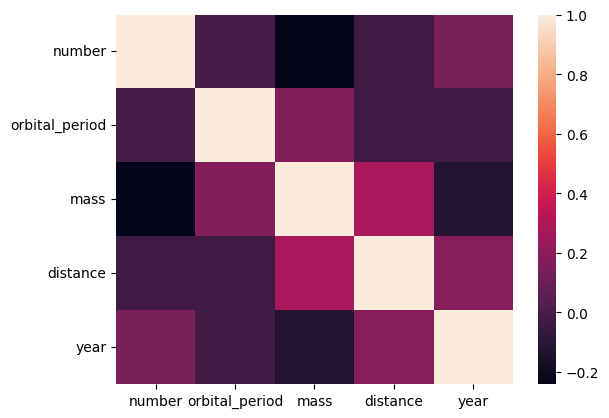

In [49]:
sns.heatmap(df.corr(numeric_only=True))

/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


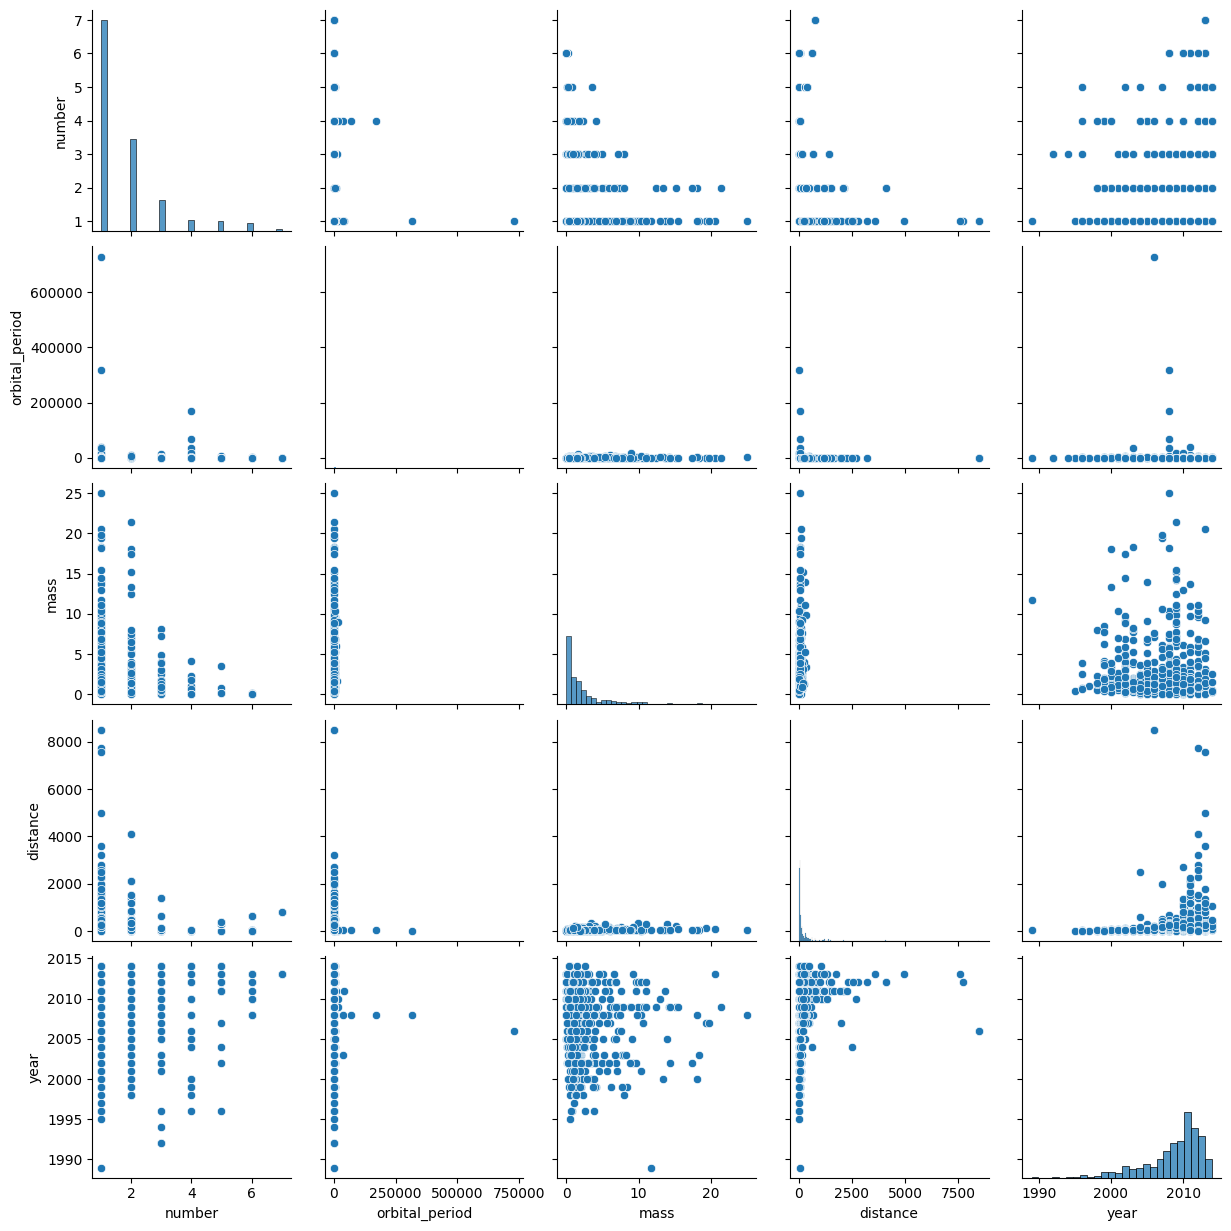

In [56]:
sns.pairplot(df)

Next, we are going to try to give a bit of an answer to the above question by making a new column in the dataframe that we can use to color code by a column having missing data (or not).

👉🏻 Discuss the following code with your group members, and create a markdown cell where you explain _in detail_ what each line of code is doing. In the pairplot, why are there no orange points in the row and column with the mass variable? Does the pairplot give you additional insights into missingness?

Try columns other than "mass".


In [61]:
df["was_NaN"] = False
df.loc[df["distance"].isnull() == True, "was_NaN"] = True
df.head(8)

,method,number,orbital_period,mass,distance,year,was_NaN
0,Radial Velocity,1,269.300,7.10,77.40,2006,False
1,Radial Velocity,1,874.774,2.21,56.95,2008,False
2,Radial Velocity,1,763.000,2.60,19.84,2011,False
3,Radial Velocity,1,326.030,19.40,110.62,2007,False
4,Radial Velocity,1,516.220,10.50,119.47,2009,False
5,Radial Velocity,1,185.840,4.80,76.39,2008,False
6,Radial Velocity,1,1773.400,4.64,18.15,2002,False
7,Radial Velocity,1,798.500,NaN,21.41,1996,False


/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


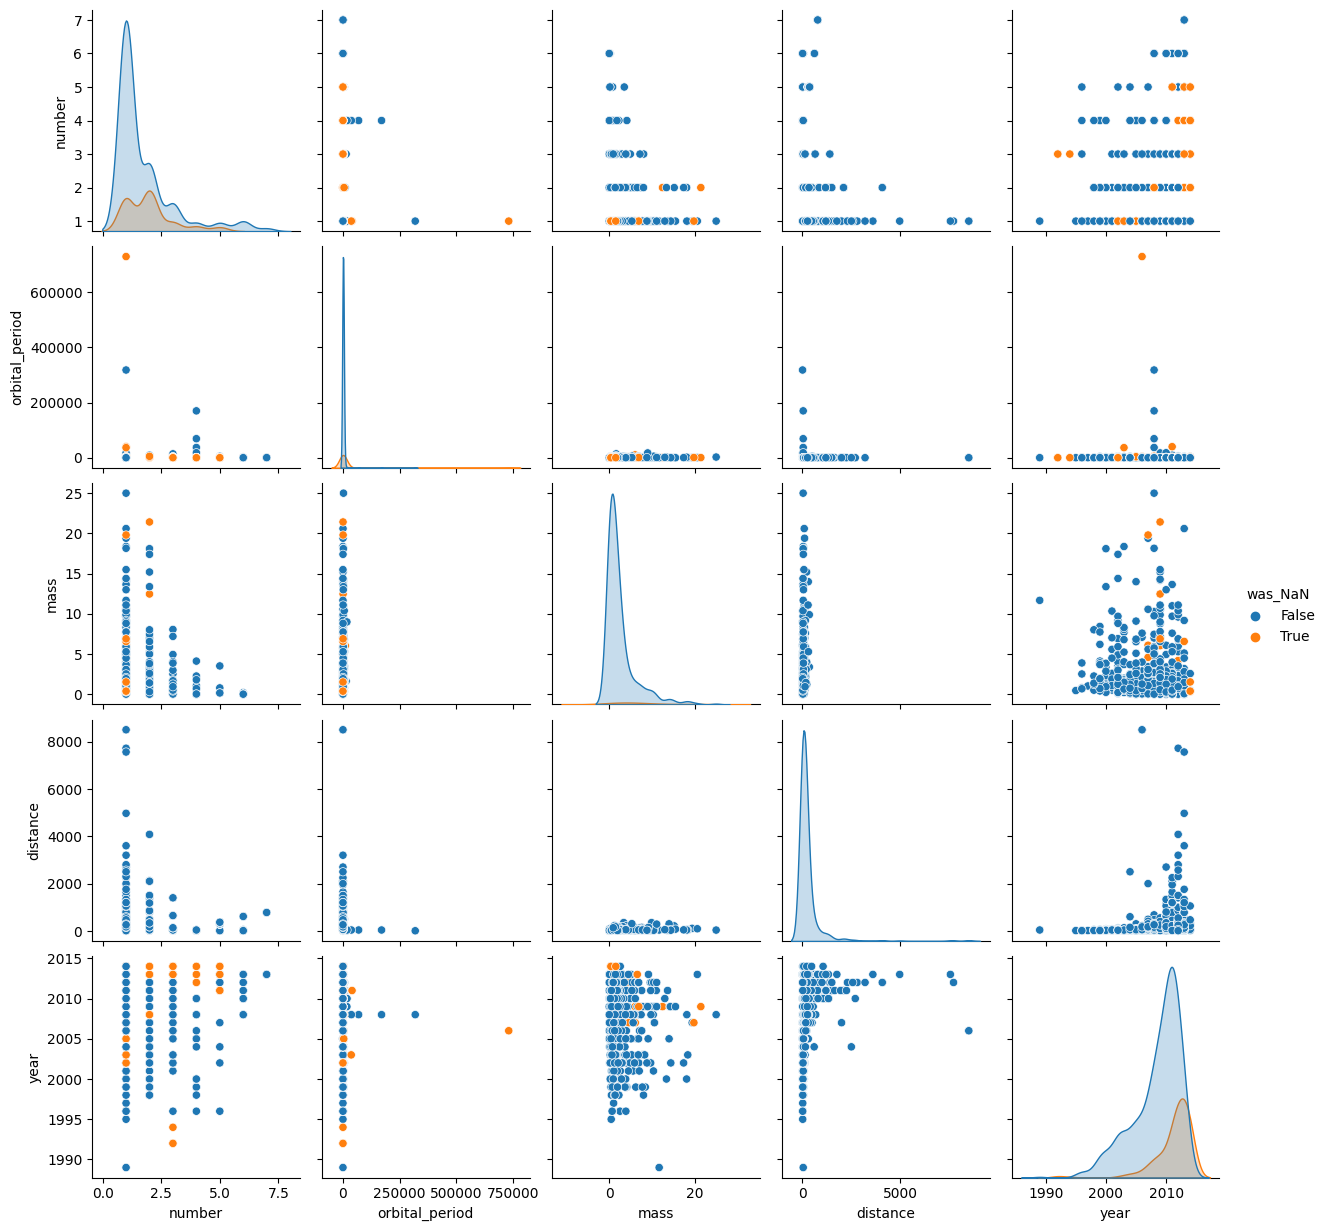

In [62]:
sns.pairplot(df, hue="was_NaN")

NA values are excluded only in pairwise correlations as previously mentioned. Rows with numeric combinations in other pairings will still have those pairings be plotted, rather than a whole row be deleted. When a pair with one or both NA occurs, it will not plot on that pairing's graph.

👉🏻 Discuss this code with your group. What does it do? In particular, are there issues with `sklearn` libraries preferring to use `numpy` arrays rather than `pandas` dataframes?

Explore the `strategy=` option in `SimpleImputer`.

In [96]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent") #default strategy is mean imputation
fixed_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))
#fixed_df["method"] = df["method"]
fixed_df.insert(0, 'method', df["method"])
fixed_df.columns = df.columns
fixed_df.index = df.index

In [97]:
fixed_df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1.0,269.300000,7.10,77.40,2006.0
1,Radial Velocity,1.0,874.774000,2.21,56.95,2008.0
2,Radial Velocity,1.0,763.000000,2.60,19.84,2011.0
3,Radial Velocity,1.0,326.030000,19.40,110.62,2007.0
4,Radial Velocity,1.0,516.220000,10.50,119.47,2009.0
...,...,...,...,...,...,...
1030,Transit,1.0,3.941507,1.80,172.00,2006.0
1031,Transit,1.0,2.615864,1.80,148.00,2007.0
1032,Transit,1.0,3.191524,1.80,174.00,2007.0
1033,Transit,1.0,4.125083,1.80,293.00,2008.0


In [98]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


Next, you are on your own to explore. Show us what you can do!

One basic idea is to examine the new dataframe to see what `SimpleImputer` did. For example, to get you started, we can look at the correlations with the new dataframe. [Try different options](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) in `SimpleImputer` as well as other imputers. You can also make a new pairplot.

For example, does your conclusion about the correlations in the data change after you have imputed? Can you connect with missingness types?

👉🏻  Either open a markdown cell to describe your findings, or put really good titles on your plots so that Mahyar can figure out what you did!

Text(0.5, 1.0, 'No Impute Correlation Heatmap')

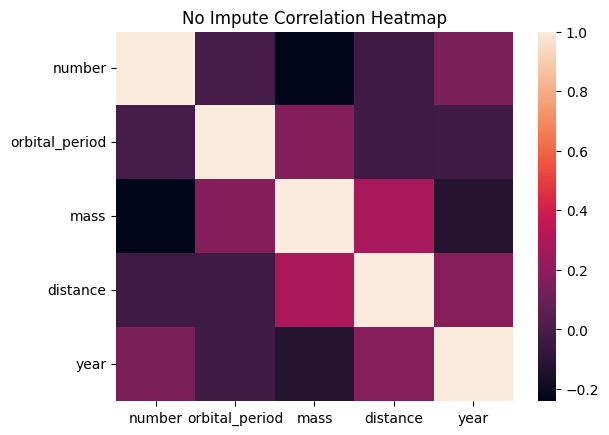

In [110]:
sns.heatmap(df.corr(numeric_only=True))
plt.title("No Impute Correlation Heatmap")

Text(0.5, 1.0, 'Mode Imputation')

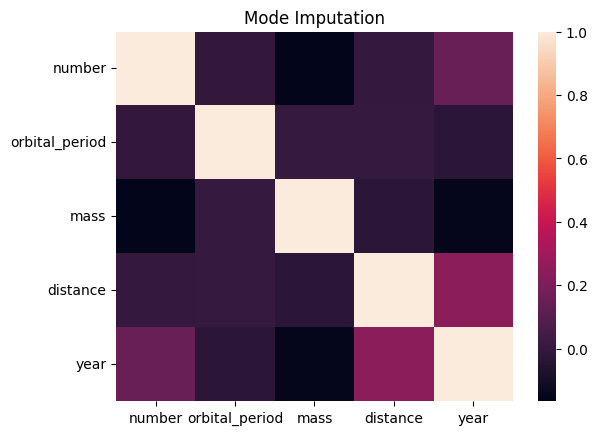

In [111]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent") #default strategy is mean imputation
mode_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))
#fixed_df["method"] = df["method"]
mode_df.insert(0, 'method', df["method"])
mode_df.columns = df.columns
mode_df.index = df.index
sns.heatmap(mode_df.corr(numeric_only=True))
plt.title("Mode Imputation")

Text(0.5, 1.0, 'Mean Imputation')

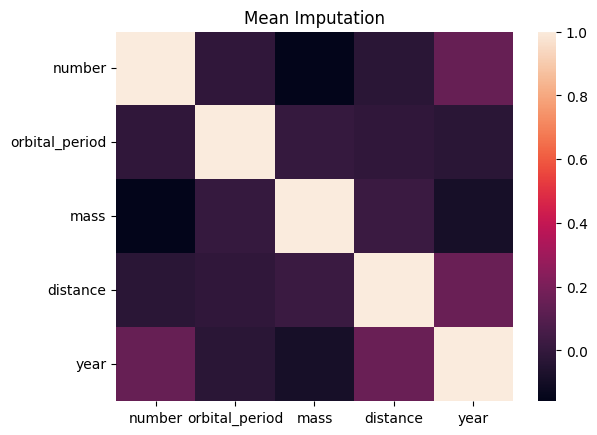

In [112]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN, strategy="mean") #default strategy is mean imputation
mean_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))
#fixed_df["method"] = df["method"]
mean_df.insert(0, 'method', df["method"])
mean_df.columns = df.columns
mean_df.index = df.index
sns.heatmap(mean_df.corr(numeric_only=True))
plt.title("Mean Imputation")

Text(0.5, 1.0, 'Median Imputation')

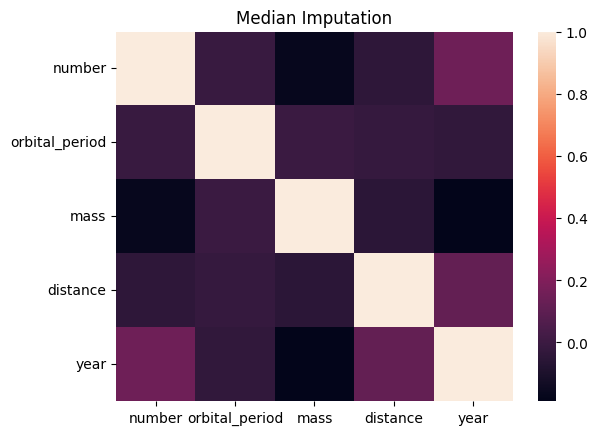

In [113]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN, strategy="median") #default strategy is mean imputation
median_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))
#fixed_df["method"] = df["method"]
median_df.insert(0, 'method', df["method"])
median_df.columns = df.columns
median_df.index = df.index
sns.heatmap(median_df.corr(numeric_only=True))
plt.title("Median Imputation")

Text(0.5, 1.0, 'Zero Imputation')

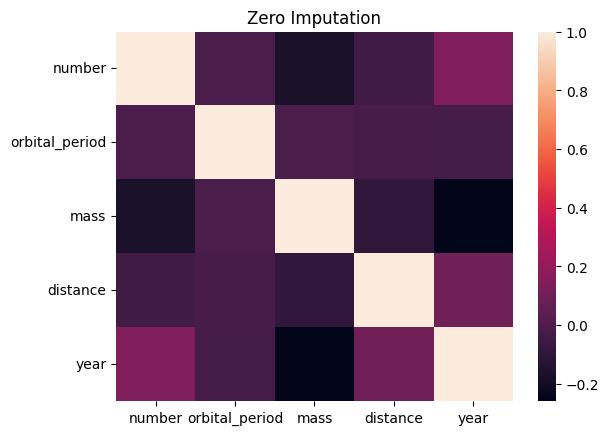

In [114]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0) #default strategy is mean imputation
zero_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))
#fixed_df["method"] = df["method"]
zero_df.insert(0, 'method', df["method"])
zero_df.columns = df.columns
zero_df.index = df.index
sns.heatmap(zero_df.corr(numeric_only=True))
plt.title("Zero Imputation")

___
<font color=#FFB00> Final Part: Repairing Missing Values </font>

Next, you will impute a defective dataset using a library from `sklearn`. Do this by starting with a known, clean dataset and adding the defects yourself in a controlled manner. Make a copy of the defective dataset so that you can compare your repaired dataset to the original - usually you won't know what the correct dataset looks like, but you will in this case.

Here is the plan:
* get the iris dataset and ensure that it is clean,
* choose random elements in the dataframe and replace their values with `NaN`s,
* visualize the new, defective dataset,
* repair the dataset,
* find the difference between the original clean dataset and the repaired dataset to see how well the imputation worked.

In [115]:
# get the dataset and make a copy of it
iris_orig = sns.load_dataset("iris")

# why do we do this?
iris_orig = iris_orig.drop(columns="species")

iris_new = iris_orig.copy()

Here is a possible code for adding random values to a dataframe. Discuss among your group how this works. Add comments to the code.

In [141]:
percent_NaN = 50 #percentage of controlled NAs to add

tuple_rcs = [(row, col) for row in range(iris_new.shape[0]) for col in range(iris_new.shape[1])] #generate all possible indices combinations


#grab a random sample of index combinations, sample the percentage of NAs set in variable above
for row, col in random.sample(tuple_rcs, int(round(percent_NaN/100*len(iris_new)))):
    iris_new.iat[row, col] = np.nan #set the sampled index pairing to a NumPy NA value

Answer these questions:
* how many people in your group have used list comprehensions? <font color="pink">3</font>
* how many people have used list comprehensions to create lists of tuples? <font color="pink">1</font>
* how does `random.sample` work? <font color="pink">`random.sample` grabs a sample from a dataset randomly, provided an "n" number of values to select and returns a new list of sampled values with "n" length.</font>

Let's examine our defective dataset.

<Axes: >

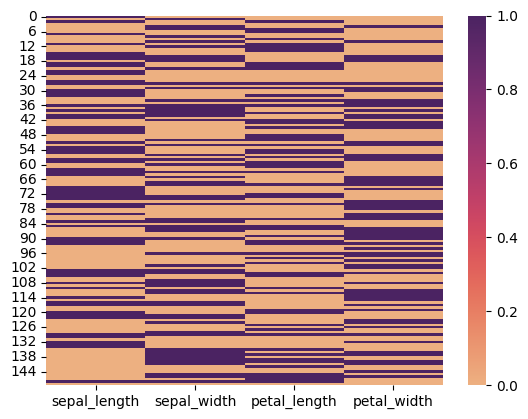

In [142]:
sns.heatmap(iris_new.isna(), cmap="flare")

As mentioned in the lecture, there are many ways to impute, some better than others. Today, we will use an imputer from the `sklearn` library called the [KNN Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). Read about this imputer and discuss it with your group, especially what its options are (e.g., `n_neighbors`).

Text(0.5, 1.0, 'Standardized Residuals')

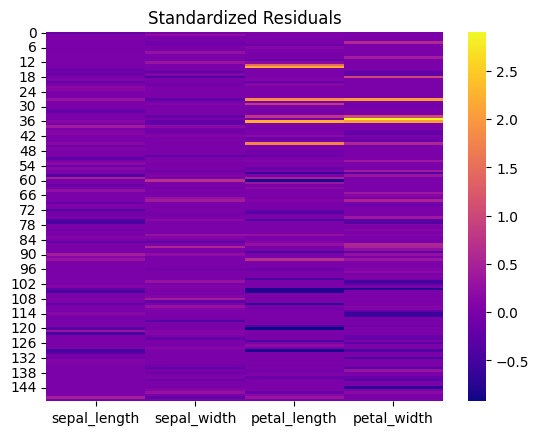

In [148]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
iris_fixed = pd.DataFrame(imputer.fit_transform(iris_new))
iris_fixed.columns = iris_new.columns
standardResidual = (iris_fixed - iris_orig)/np.sqrt(iris_orig)
sns.heatmap(standardResidual, cmap="plasma")
plt.title("Standardized Residuals") # 2-3 neighbors appears to be best when dealing with 50% missingness

Ok, I'll let you and your group members take it from here. Fix the dataset! And, then visualize it!

Visualize the result by comparing your imputed dataset with the original. Discuss with your group and in a markdown cell how well the imputer worked. Vary the options in the library to see how sensitive the result is to this choice, and comment on your findings.

Run your code many times since the `NaN`s are created randomly - you don't want to draw conclusions based only on one dataset.

If you _really_ need a hint, here is some hint code. Don't look at this unless you really need to.

In [ ]:
# my_imputer = KNNImputer(n_neighbors=1)
# iris_repaired = pd.DataFrame(my_imputer.fit_transform(iris_new), columns=iris_new.columns)
# sns.heatmap(100*(iris_repaired - iris_orig)/iris_orig, cmap="plasma")

_____

Remember to include your name, who was in your group and upload to D2L.